In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [19]:
if os.path.isfile("air-con-climate-data-july-7-2015.xlsx"):
    filepath = "air-con-climate-data-july-7-2015.xlsx"
    print "loading from file"
else:
    filepath = "http://data.gov.au/dataset/9cb612b2-c303-4fb1-b87b-c987baa7e26b/resource/941dcd1b-a686-4455-9609-ecf6837d786e/download/air-con-climate-data-july-7-2015.xlsx"
    print "loading from the internet"

aircon_data = pd.read_excel(filepath)
print type(aircon_data)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


In [20]:
aircon_data.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours
0,800,130.8,-12.5,1,5377,0
1,801,130.8,-12.5,1,5377,0
2,804,130.8,-12.4,1,5377,0
3,810,130.9,-12.4,1,5377,0
4,811,130.9,-12.4,1,5377,0


In [21]:
aircon_data.columns

Index([u'Postcode', u'Longitude', u'Latitude', u'NatHERS Climate zone',
       u'Annual cooling hours', u'Annual heating hours'],
      dtype='object')

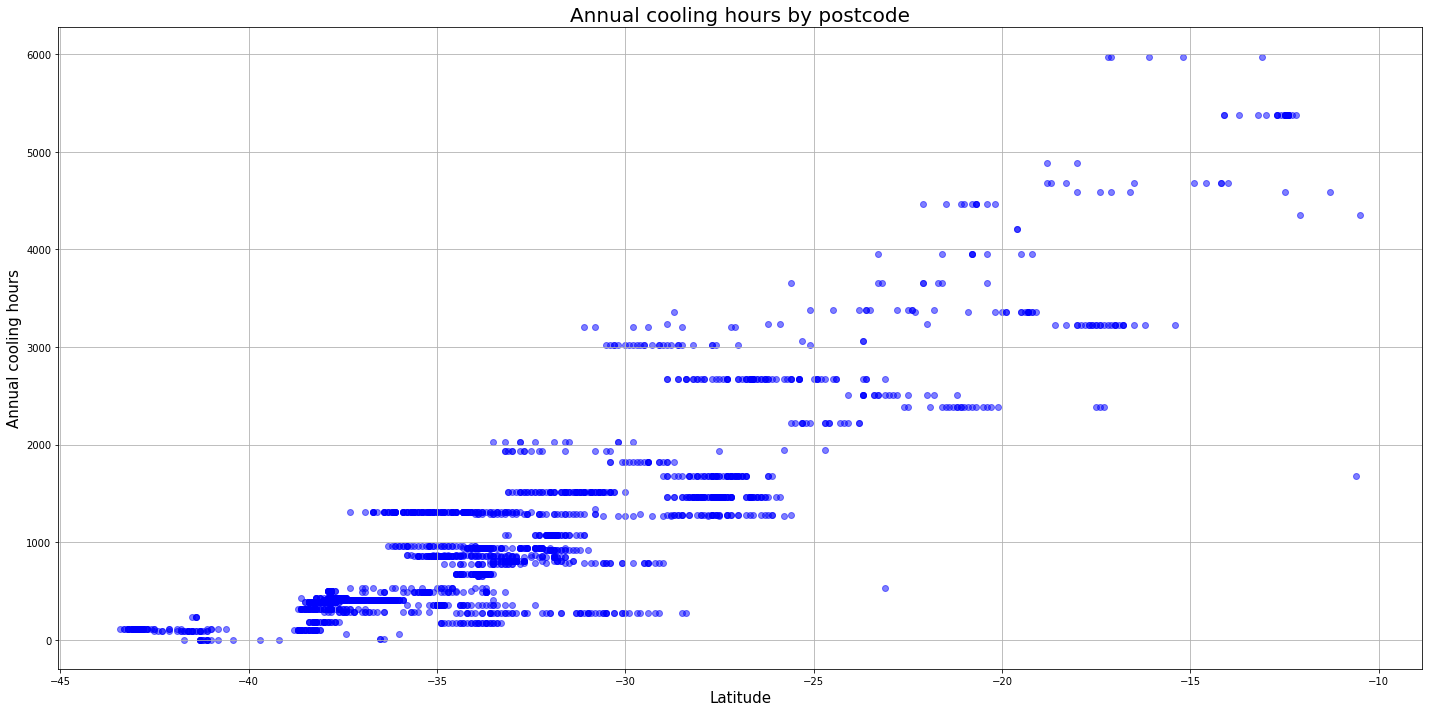

In [22]:
x=aircon_data["Latitude"]
y=aircon_data["Annual cooling hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="b", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual cooling hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


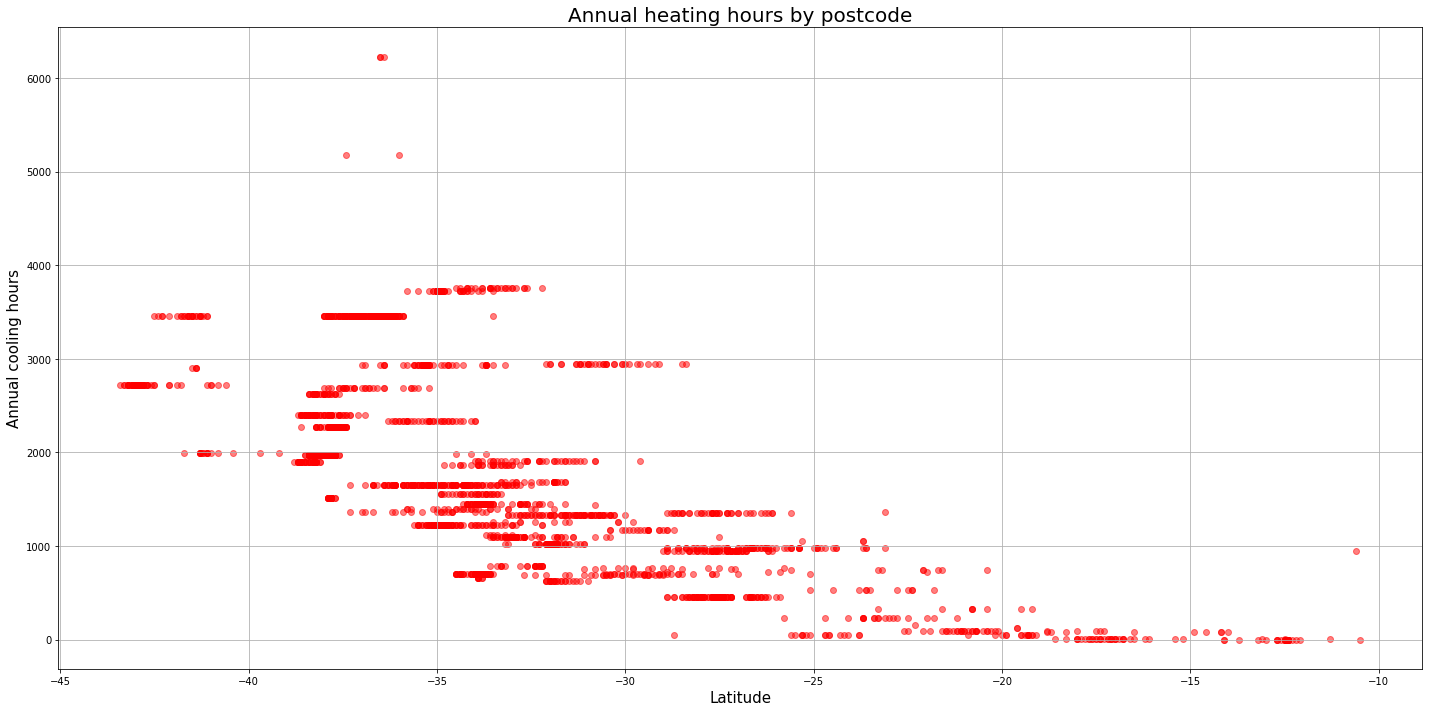

In [23]:
x=aircon_data["Latitude"]
y=aircon_data["Annual heating hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="r", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


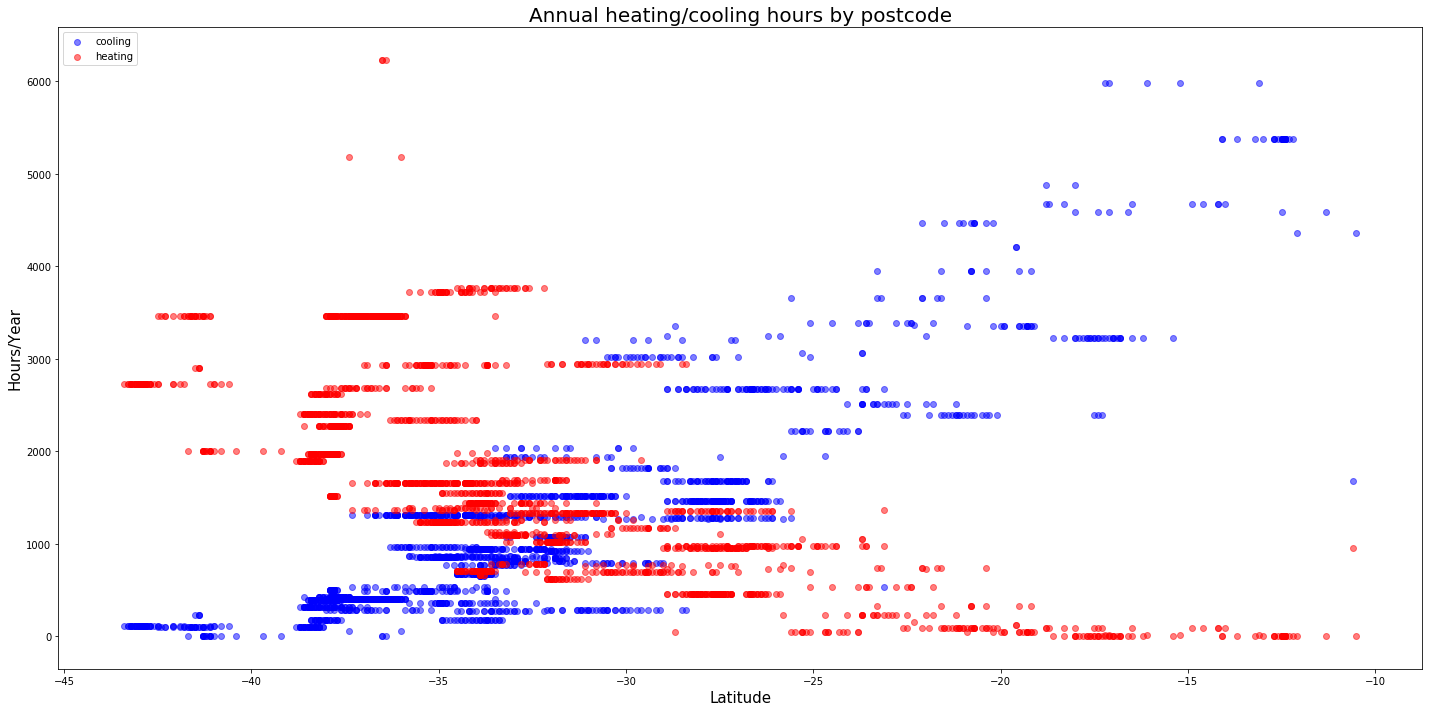

In [24]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left');
fig.tight_layout()



plt.show()


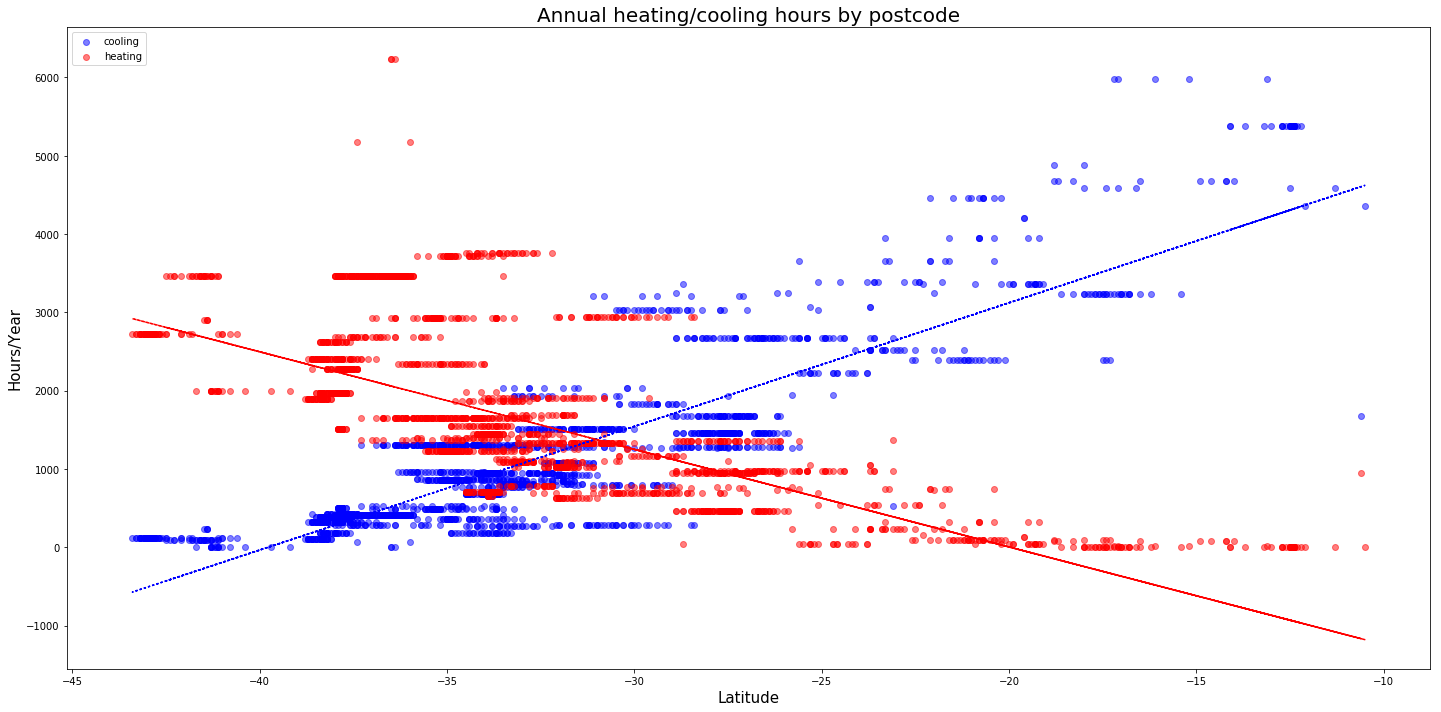

In [25]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left');

fig.tight_layout()


tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")
         



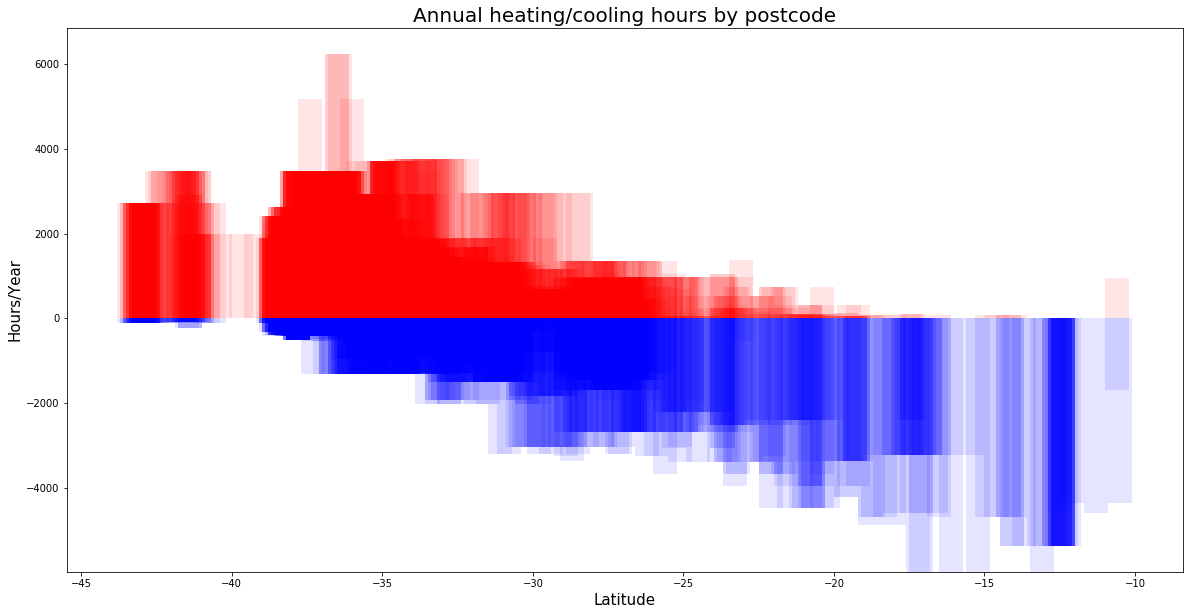

In [26]:
# Y = np.arange(len(aircon_data["Latitude"]))

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.bar(y, -aircon_data["Annual cooling hours"],  color = 'b', alpha=0.1)
plt.bar(y, aircon_data["Annual heating hours"], color = 'r', alpha=0.1)
plt.show()

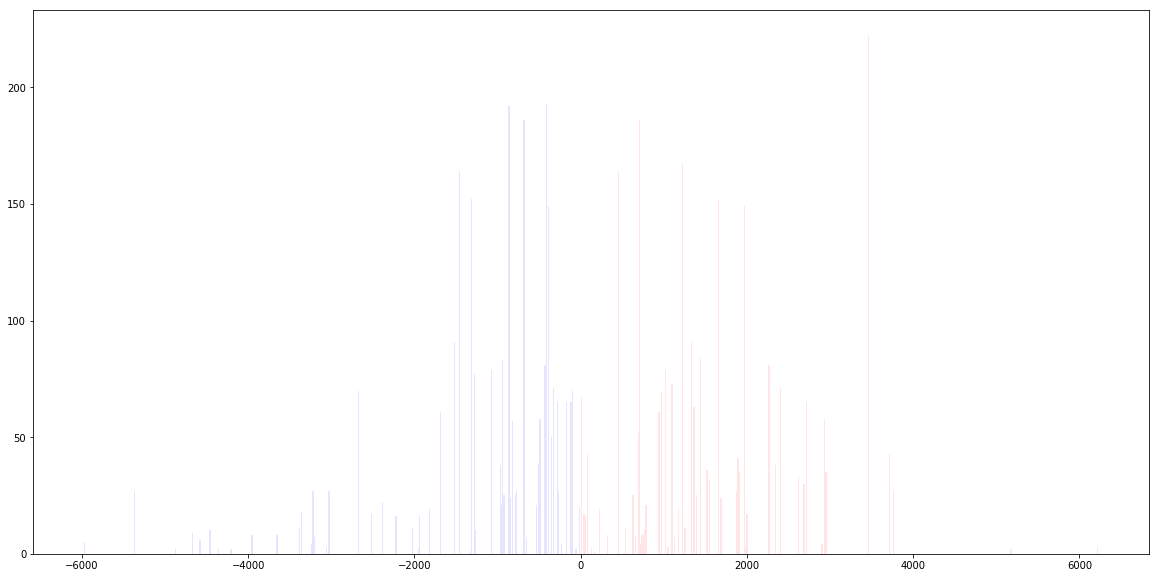

In [27]:
# Y = np.arange(len(aircon_data["Latitude"]))

# fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.hist( -aircon_data["Annual cooling hours"], bins =400,  color = 'b', alpha=0.1)
plt.hist( aircon_data["Annual heating hours"], bins = 400, color = 'r', alpha=0.1)
plt.show()

In [28]:
# Y = np.arange(len(aircon_data["Latitude"]))
sorted_aircon = aircon_data.sort_values("Latitude", axis = 0, ascending = True)
sorted_aircon.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours
1045,7150,147.1,-43.4,26,113,2723
1040,7112,147.1,-43.3,26,113,2723
1043,7117,147.0,-43.3,26,113,2723
1039,7109,146.5,-43.2,26,113,2723
1042,7116,146.9,-43.2,26,113,2723


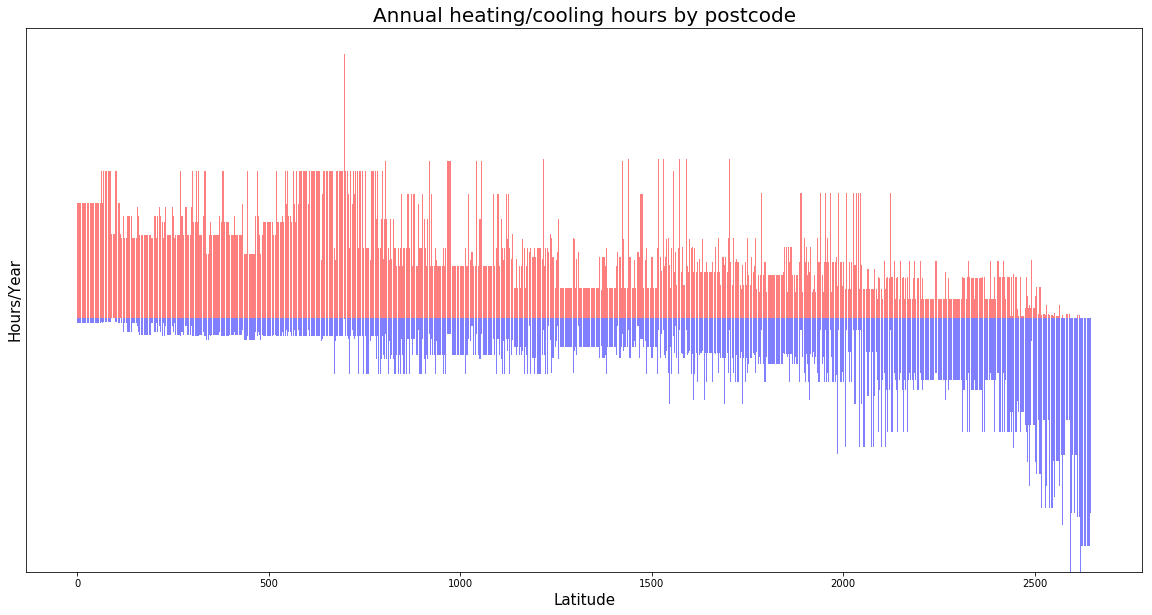

In [29]:
fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)


x = sorted_aircon["Latitude"]


maxH = max(sorted_aircon["Annual heating hours"])
maxC = max(sorted_aircon["Annual cooling hours"])

yLabels = [maxC, "0", maxH]
yPos = [-maxC, "0", maxH]

xPos = np.arange(len(x))
xPos = [i for i in xPos]
# xPos10 = len(x)/10
# xLabels = sorted_aircon["Latitude"][xPos10]
# xPos10 = np.arange(xPos10)



# xLabels = map(sorted_aircon["Latitude"]()

# x = [i for i in aircon_data["Latitude"]]
# x = [i for i in range(len(y))]
# x = [i for i in range(len(y))]

plt.yticks(yPos, yLabels)
# plt.xticks(xPos10, xLabels)
plt.bar(xPos, -sorted_aircon["Annual cooling hours"],  color = 'b', alpha=0.5)
plt.bar(xPos, sorted_aircon["Annual heating hours"], color = 'r', alpha=0.5)
plt.show()

In [30]:
"3D tests bellow"

'3D tests bellow'

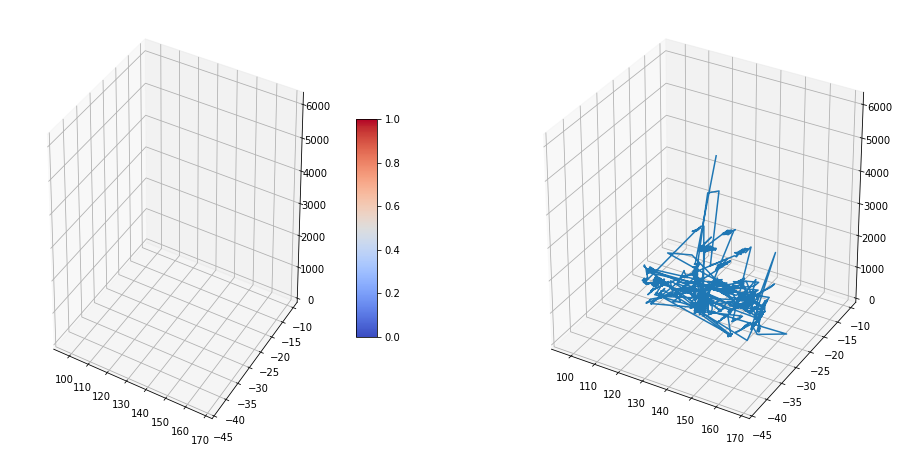

In [48]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = aircon_data["Longitude"]
Y = aircon_data["Latitude"]
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = aircon_data["Annual heating hours"]
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# #===============
# # Second subplot
# #===============
# # set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [33]:
"""state tests bellow"""

'state tests bellow'

In [34]:
def setState (pc):
    states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return states[0]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return states[1]
    elif 3000 <= pc < 4000:
        return states[2]
    elif 4000 <= pc < 5000:
        return states[3]
    elif 5000 <= pc < 6000:
        return states[4]
    elif 6000 <= pc < 7000:
        return states[5]
    elif 7000 <= pc < 8000:
        return states[6] 
    elif 800 <= pc < 900:
        return states[7]
    else:
        pass


# print setState(2605)
# print setState(2000)
# print setState(3000)
# print setState(4000)
# print setState(5000)
print setState(6000)
print setState(7000)
print setState(800)

#  stateC = {"ACT" : ,"y", 
#               "NSW" : "c", 
#               "VIC" : "b", 
#               "QLD" : "m", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}



stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}


def setStateC (pc):
    stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return stateC["ACT"]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return stateC["NSW"]
    elif 3000 <= pc < 4000:
        return stateC["VIC"]
    elif 4000 <= pc < 5000:
        return stateC["QLD"]
    elif 5000 <= pc < 6000:
        return stateC["SA"]
    elif 6000 <= pc < 7000:
        return stateC["WA"]
    elif 7000 <= pc < 8000:
        return stateC["TAS"] 
    elif 800 <= pc < 900:
        return stateC["NT"]



print setStateC ("NSW")

# print stateC[setState(2605)]
# print stateC[setState(2000)]
# print stateC[setState(3000)]
# print stateC[setState(4000)]
# print stateC[setState(5000)]
# print stateC[setState(6000)]
# print stateC[setState(7000)]
# print stateC[setState(800)]

# def setStateC (s):
#     return stateC[s]

# print setStateC ("NSW")

# def setStateC (pc):
#     s = setState (pc)
# #     return stateC[s]

print setStateC (3444)
print setStateC (5444)
print setStateC (6444)
print setStateC (2444)
print setStateC (800)



WA
TAS
NT
None
blue
r
k
lightskyblue
orange


In [35]:
airdf = aircon_data

stateList = airdf["Postcode"].apply(setState)
airdf["State"] = stateList.values

colourList = airdf["Postcode"].apply(setStateC)
airdf["State colour"] = colourList.values
# print colourList


airdf.head()

# print airdf["State colour"]

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour
0,800,130.8,-12.5,1,5377,0,NT,orange
1,801,130.8,-12.5,1,5377,0,NT,orange
2,804,130.8,-12.4,1,5377,0,NT,orange
3,810,130.9,-12.4,1,5377,0,NT,orange
4,811,130.9,-12.4,1,5377,0,NT,orange


In [36]:

# colourList = stateC[airdf["State"]]
# print colourList


# colourList = airdf["State"].apply(setStateC)
# print colourList

# airdf["State colour"] = colourList.values
# airdf.head()

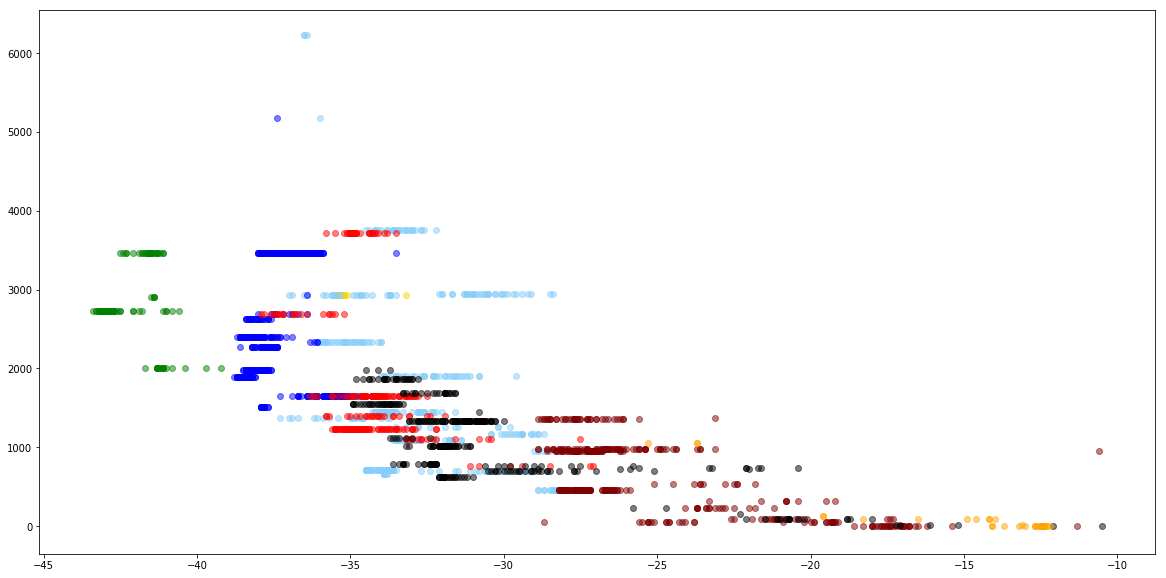

In [42]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)
plt.show()

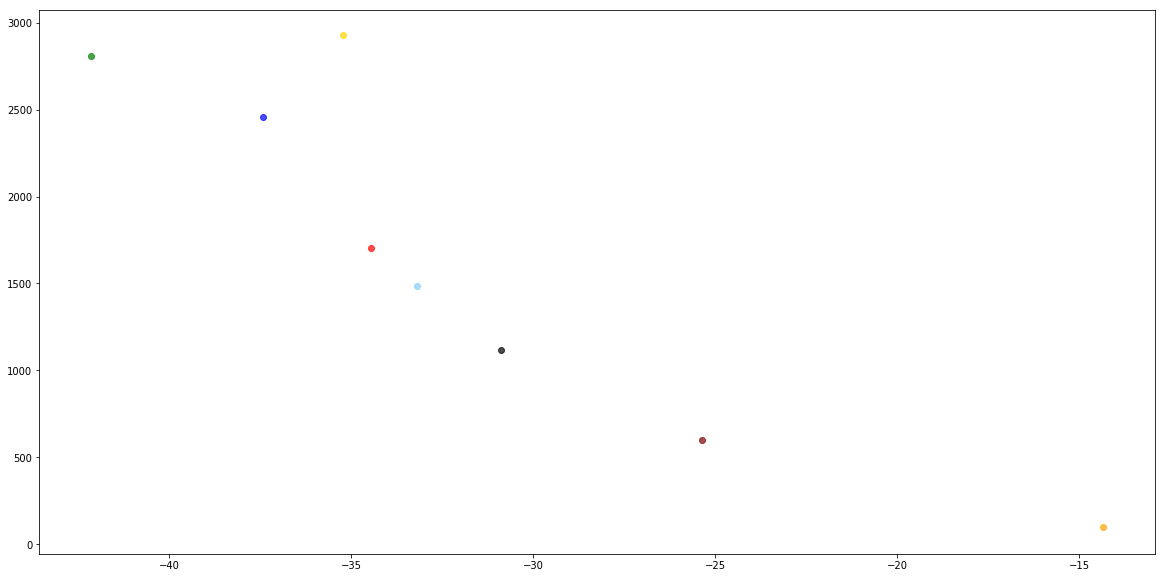

In [43]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state], alpha = 0.7)
plt.show()

ValueError: Invalid RGBA argument: None

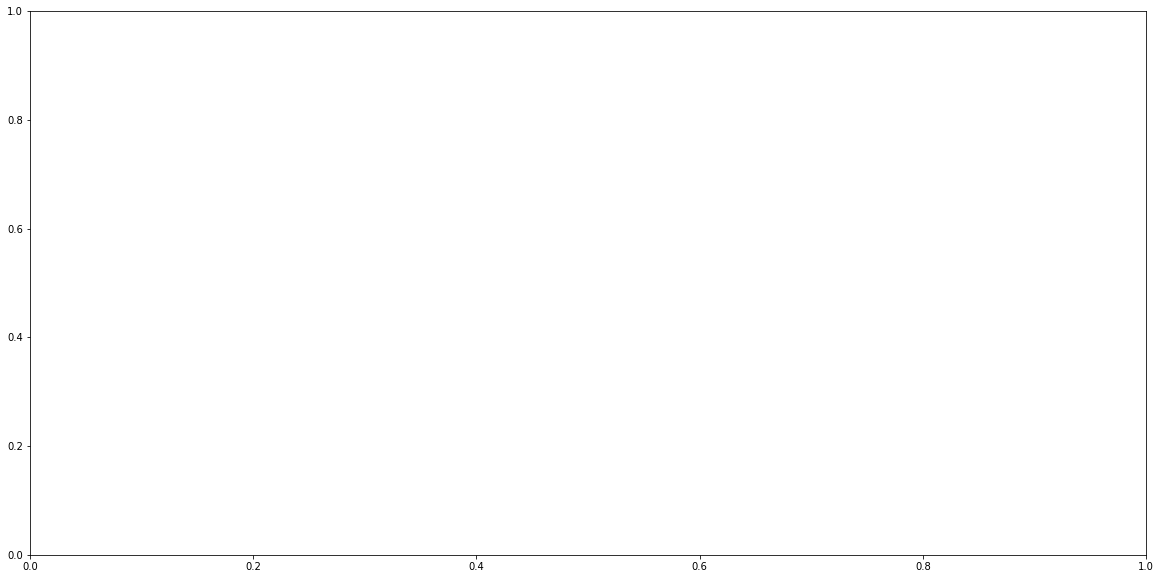

In [206]:
x=airdf["Latitude"]
y=airdf["Annual heating hours"]
s = airdf["State"].tolist()
sc = airdf["State colour"].tolist()

fig, ax = plt.subplots()
# ax.scatter(x, y , c=[stateC[x] for x in airdf.State], alpha=0.5)
ax.scatter(x, y , c=sc, alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

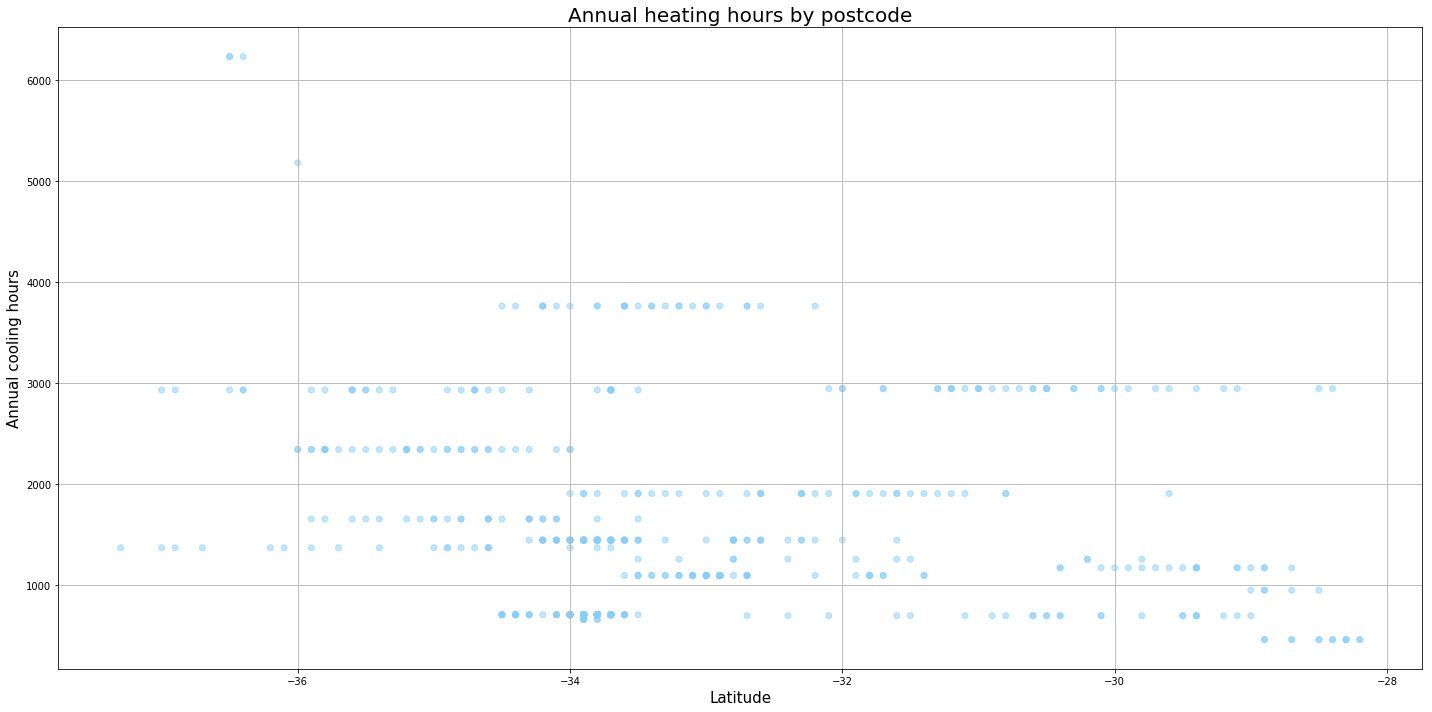

In [210]:
x=airdf["Latitude"][airdf["State"]=="NSW"]
y=airdf["Annual heating hours"][airdf["State"]=="NSW"]
s = airdf["State"].tolist()
sc = airdf["State colour"][airdf["State"]=="NSW"].tolist()

fig, ax = plt.subplots()
# ax.scatter(x, y , c=[stateC[x] for x in airdf.State], alpha=0.5)
ax.scatter(x, y , c=sc, alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

KeyError: '[-12.5 -12.5 -12.4 ..., -36.5 -36.5 -36.4] not in index'

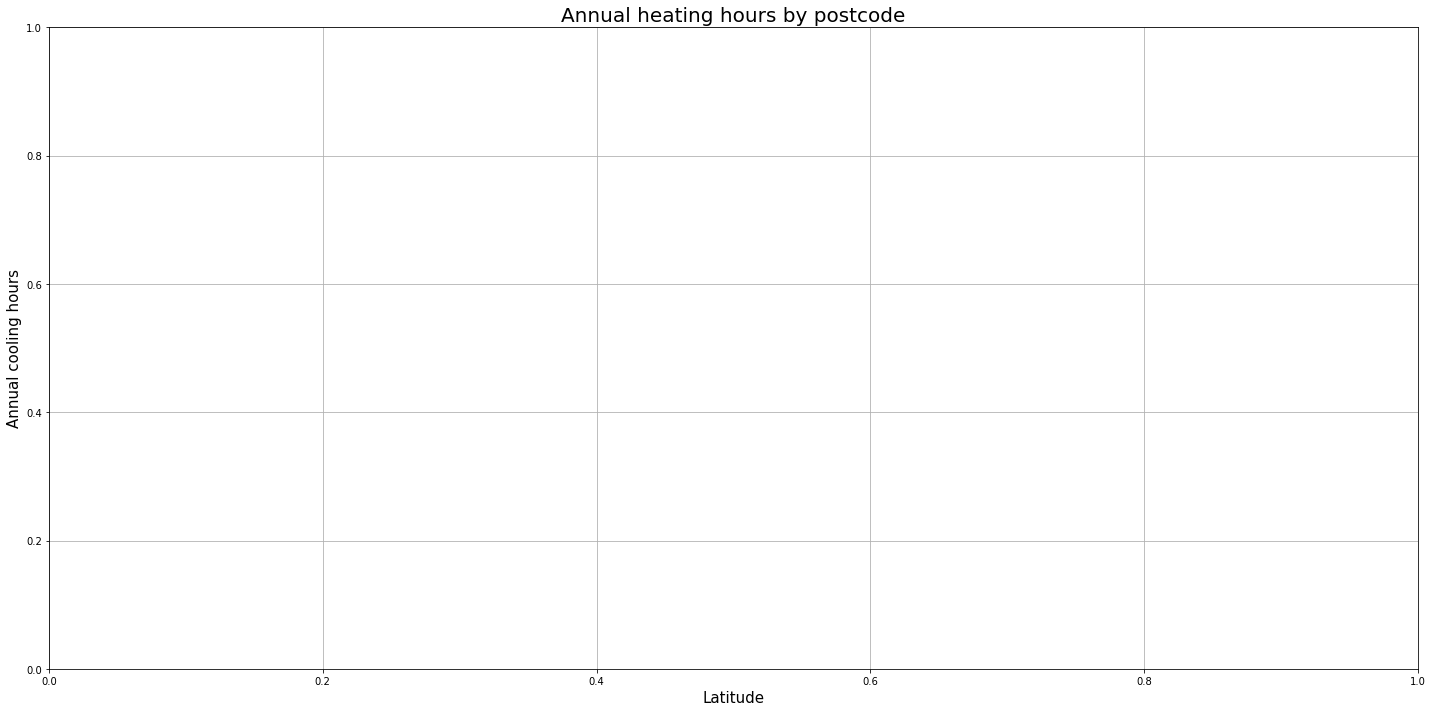

In [178]:
x=airdf["Latitude"]
y=airdf["Annual heating hours"]
s = airdf["State"]
# sc = airdf["State colour"]


    
fig, ax = plt.subplots()
# ax.scatter(x, y , c=[stateC[x] for x in airdf.State], alpha=0.5)
# ax.scatter(x, y , c=s.apply(lambda x: stateC[x]), alpha=0.5)
# .apply(lambda x: colors[x])
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()



grouped = airdf.groupby("State")
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=x, y=y, label=key, color=stateC[key])

plt.show()

['r' 'blue' 'gold' 'lightskyblue' 'g' 'r' 'lightskyblue' 'orange' 'gold'
 'lightskyblue' 'k' 'maroon' 'k' 'blue' 'lightskyblue' 'blue' 'g' 'blue'
 'k' 'orange' 'lightskyblue' 'gold' 'k' 'g' 'g' 'r' 'k' 'orange' 'r'
 'lightskyblue' 'blue' 'k' 'orange' 'maroon' 'lightskyblue' 'lightskyblue'
 'blue' 'k' 'orange' 'lightskyblue' 'k' 'g' 'orange' 'lightskyblue' 'r' 'r'
 'r' 'blue' 'orange' 'g']


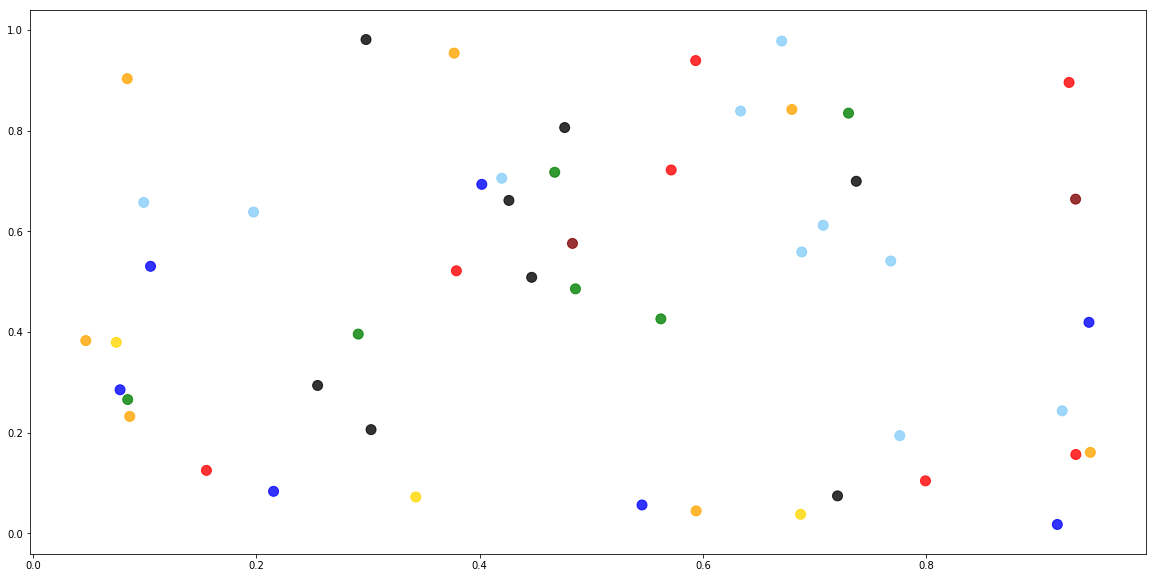

In [190]:
x=airdf["Latitude"]
y=airdf["Annual heating hours"]
s = airdf["State"]
# sc = airdf["State colour"]

    
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
# s = np.random.choice(states, N)
colors = np.random.choice([ "gold", 
               "lightskyblue", 
               "blue", 
               "maroon", 
               "r", 
               "k", 
               "g", 
              "orange"], N
)
print colors

plt.scatter(x, y, s=100, c=colors, alpha=0.8)
plt.show()

In [ ]:
"""Mapping tests bellow"""

In [ ]:
# import os
import geopandas as gp
import shapely
import fiona
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

In [ ]:


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)



shp_file_name = "POA_2016_AUST.shp"
zip_file_name = "1270055003_poa_2016_aust_shape.zip"
web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [ ]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()


In [ ]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(zip_file_name):
        print "unzipping"
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print "done"

In [ ]:
poa = gp.GeoDataFrame.from_file(shp_file_name)
poa.head()

In [ ]:
# poa.geometry.plot()

In [ ]:
# def GeoLookup(df1Poa, df2Poa, df1Geo, df2Geo):
#     for i in df1Poa:
#         if df1Poa[i] == df2Poa[i]:
#            df1Geo = df2Geo[i]
        
def GeoLookup(df1Poa, df2Poa,  df2Geo):
    for i in df1Poa:
        if len(df1Poa) < 4:
            df1Poa = "0"+df1Poa
        if df1Poa == df2Poa:
           return df2Geo
    

In [ ]:
# GeoLookup(aircon_data["Postcode"], poa["POA_CODE16"], aircon_data["geometry"], poa["geometry"])

# print aircon_data.head()

print GeoLookup(aircon_data["Postcode"][:5], poa["POA_CODE16"], poa["geometry"])

In [ ]:
aircon_data["geometry"] =